In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("healthcare.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Problem statement

**Goal to predict the patient will get stroke or not by using given features in the dataset with the help of classification model.**

## Variables Details

#### ID:
Unique identifier

#### Gender: 
Male, Female and Other

#### Age:
Age of the patient

#### Hypertension:
It referred as high blood pressure. 0 if he doesnot has Hypertension and 1 if he has it.

#### Heart disease:
0 if he doesnot has heart disease and 1 if he has it.

#### Ever married:
"Yes" if he is married else "No".

#### Work type:
It gives the occupancy of a patient in 4 categories which are "Government", "Never worked", "Private" and "Self employed".

#### Residence Type:
It basically referred as area the patient lives in. Rural and Urban.

#### Average Glucose level:
Average glucose level in blood of a patient.

#### BMI:
Body mass index of the patient

#### Smoking status:
smoking status of patient. "Formerly smoked", "Never smoked" and "Smokes".

#### Stroke:
Ultimate target variable which defined by the above varibles.

## Hypothesis

**Id doesn't affect the patient condition.**

**Gender may or may not affect the patient condititon.**

**If age is more then there is high chance to get stroke.**

**If patient has hypertension then there is more chance to get stroke.**

**If patient has heart disease then there is high chance to get stroke.**

**Marriage status may shown impact on patient.**

**work type may be shown impact on patient.**

**Residence type may be shown impact on patient.**

**If average glucose level in blood increases then there is more chance to get stroke.**

**Body mass index is high, there is high chance to get stroke.**

**If patient has smoking habit then there is high chance to get stroke.**


### Data Preparation

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split     
from sklearn.neighbors import KNeighborsClassifier        
from sklearn.model_selection import cross_val_score     
from sklearn.metrics import confusion_matrix ,classification_report

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# reading the data
data = pd.read_csv("newdata.csv")

In [4]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,27.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
data.loc[(data["gender"] == "Other")]   # locating the index of gender's category 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [6]:
data1 = data.drop(index=3116)   # dropping the other category from gender column

In [7]:
data1.loc[(data.gender == "Other")]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [8]:
# Get number of unique values from each feature.
unique = {}
for column in data1.columns:
    unique[column] = len(data1[column].unique())

print(unique)

{'id': 5109, 'gender': 2, 'age': 104, 'hypertension': 2, 'heart_disease': 2, 'ever_married': 2, 'work_type': 5, 'Residence_type': 2, 'avg_glucose_level': 3978, 'bmi': 418, 'smoking_status': 3, 'stroke': 2}


In [9]:
binary_columns = ["gender","ever_married","Residence_type"]    # creating binary columns for 2 category columns

In [10]:
new_data = data1.copy()     # copying the data into "new_data" variable

In [11]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

for i in binary_columns:
    # Assigning numerical values and storing in another column
    new_data[i] = labelencoder.fit_transform(new_data[i])
    new_data

In [12]:
new_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,51676,0,61.0,0,0,1,Self-employed,0,202.21,27.1,never smoked,1
2,31112,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,60182,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,1665,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1


### Dummies
* **Created a list of category columns which are having more than 2 categories and created dummy variables.**
* **Now dropped one of the category from each column as per dummies trap functionality.**
* **Main category variables are also dropped for better prediction to avoid multicollinearity.**

In [13]:
one_hot = ["work_type","smoking_status"]        # creating a list for category columns

In [14]:
new_df = new_data.drop(["work_type","smoking_status"], axis = 1)    # dropping main variables to create dummy variables

In [15]:
dummies = pd.get_dummies(new_data[one_hot],drop_first=True)  # using dummies function to remaining category columns
dummies.head()                                              

,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_never smoked,smoking_status_smokes
0,0,1,0,0,0,0
1,0,0,1,0,1,0
2,0,1,0,0,1,0
3,0,1,0,0,0,1
4,0,0,1,0,1,0


In [16]:
trail = pd.concat([new_df, dummies], axis = 1)    # creating a new dataframe by concatenating two dataframes with dummies
trail.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,0,0
1,51676,0,61.0,0,0,1,0,202.21,27.1,1,0,0,1,0,1,0
2,31112,1,80.0,0,1,1,0,105.92,32.5,1,0,1,0,0,1,0
3,60182,0,49.0,0,0,1,1,171.23,34.4,1,0,1,0,0,0,1
4,1665,0,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0,1,0


In [17]:
final_data = trail.sample(len(trail),random_state = 0,replace = False)    # shuffling the data for better train test split

In [18]:
final_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_never smoked,smoking_status_smokes
42,61960,1,82.0,0,1,1,1,144.90,26.4,1,0,1,0,0,0,1
380,31741,1,4.0,0,0,0,0,106.22,16.7,0,0,0,0,1,1,0
1559,37759,0,53.0,0,0,1,0,72.63,66.8,0,0,1,0,0,0,1
352,40670,0,20.0,0,0,0,0,96.57,34.1,0,0,1,0,0,1,0
3639,61475,0,51.0,1,0,1,0,85.84,31.8,0,0,1,0,0,1,0


In [19]:
final_data = final_data.drop(["id"], axis = 1)         # id column also dropped
train_data = final_data[:3577]                         # splitting data into train and test data
test_data = final_data[3577:]

## fitting KNN model with optimal neighbour

In [20]:
# As per the report of EDA , variables gender and Residence type are insiginificant to target variable. 
# So, these two variables are dropped and dropping target variable and assigned to "y".
X = train_data.drop(["gender","Residence_type","stroke"], axis = 1)     
y = train_data[["stroke"]]

In [21]:
# X,y split into X_train(70%) ,X_test(30%),y_train(70%),y_test(30%) respectively
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 100)

**Finding optimum k value**

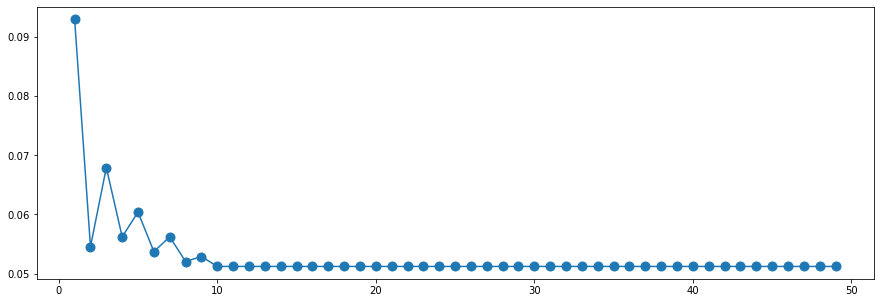

In [22]:
error_rate = []                                    # creating an empty list

for i in range(1,50):                                 # using for loop to get optimum k which gives minimum error rate
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != np.array(y_test)))       # appending errors into empty list

plt.figure(figsize=(15,5))
plt.plot(range(1,50),error_rate, marker='o', markersize=9)
plt.show()

In [23]:
knn=KNeighborsClassifier(n_neighbors=10)

#fiiting the model
knn_model = knn.fit(X_train,y_train)

# predicting
y_pred=knn_model.predict(X_test)

# predicting
knn_pred=knn.predict(X_test)

# Confusion matrix
c=confusion_matrix(y_test,knn_pred)
c

array([[1019,    0],
       [  55,    0]], dtype=int64)

##### Observations: 
* ***Knn model is predicting 0's with 100% accuracy but failed to predict 1's.***
* ***It is because due to class imbalance in the data.***
* ***Out of total train data, only 5% of cases are 1's and remaining cases are 0's.***

### Plotting AUC-ROC curve for validation data

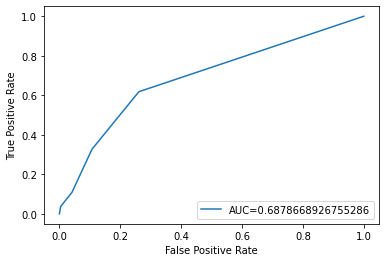

In [26]:
from sklearn import metrics                                      # importing metrics function
# plotting auc roc curve for the validation data
y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

* ***Due to class imbalance the auc roc curve value is less.***
* ***We can avoid class imbalance using under sampling and over sampling but if we use under sampling there is a chance to lose the data and can impact the model, so we used over sampling technique.***

### Over Sampling Technique

In [27]:
# extracting data and assigning predicted variables to X and target to y
X = train_data.drop(["gender","Residence_type","stroke"], axis = 1)
y = train_data[["stroke"]]

In [28]:
# import library
import imblearn

# import library
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target varialbe
x_ros, y_ros = ros.fit_resample(X, y)

print('original dataset shape:', len(y_train))
print('Resample dataset shape', len(y_ros))

original dataset shape: 2503
Resample dataset shape 6820


In [29]:
# X,y split into X_train(70%) ,X_test(30%),y_train(70%),y_test(30%) respectively
X_train,X_test,y_train,y_test = train_test_split(x_ros,y_ros,test_size = 0.3,random_state = 100)

In [30]:
knn=KNeighborsClassifier(n_neighbors=14)

#fiiting the model
over_knn_model = knn.fit(X_train,y_train)

# predicting
over_knn_pred=knn.predict(X_test)

# Confusion matrix
c=confusion_matrix(y_test,over_knn_pred)
c

array([[751, 274],
       [ 26, 995]], dtype=int64)

##### Observations:
* ***By using oversampling technique, model has predicted 1's well compared to the previous model.***

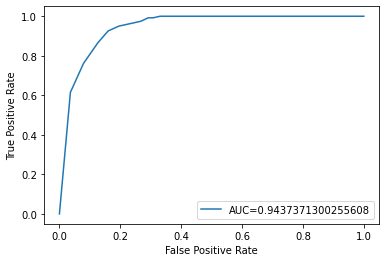

In [31]:
from sklearn import metrics
# plotting auc roc curve for the validation data
y_pred_proba = over_knn_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

##### Observations:
* ***We achieved auc roc curve value with 0.94 by eliminating class imbalance.***

## Logistic Regression

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
# extracting data and assigning predicted variables to X and target to y
X = train_data.drop(["gender","Residence_type","stroke"], axis = 1)
y = train_data[["stroke"]]

In [34]:
# finding multicollinearity to independent variables
vif = pd.DataFrame()
# by using for loop we found VIF to each variable and created a dataframe 
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,11.592985,age
1,1.215593,hypertension
2,1.155857,heart_disease
3,5.830559,ever_married
4,6.870740,avg_glucose_level
5,12.298219,bmi
6,1.046091,work_type_Never_worked
7,4.571448,work_type_Private
8,2.133500,work_type_Self-employed
9,2.022232,work_type_children


##### Observation:
* ***We can see that bmi variable has more VIF, so we are eliminating bmi from train data.***
* ***Performing the same step again to check other variables.***

In [35]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.drop(["bmi"], axis = 1).values, i) for i in range(X.drop(["bmi"], axis = 1).shape[1])]
vif["features"] = X.drop(["bmi"], axis = 1).columns
vif

,VIF Factor,features
0,10.688251,age
1,1.215504,hypertension
2,1.146145,heart_disease
3,5.674679,ever_married
4,6.207679,avg_glucose_level
5,1.037084,work_type_Never_worked
6,3.935622,work_type_Private
7,2.050368,work_type_Self-employed
8,1.911165,work_type_children
9,3.287570,smoking_status_never smoked


##### Observation:
* ***We can see that age variable has more VIF, so we are eliminating age from train data.***
* ***Performing the same step again to check remaining variables.***

In [36]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.drop(["bmi","age"], axis = 1).values, i) for i in range(X.drop(["bmi","age"], axis = 1).shape[1])]
vif["features"] = X.drop(["bmi","age"], axis = 1).columns
vif

,VIF Factor,features
0,1.188811,hypertension
1,1.098784,heart_disease
2,3.563415,ever_married
3,5.282197,avg_glucose_level
4,1.037064,work_type_Never_worked
5,3.716073,work_type_Private
6,1.811140,work_type_Self-employed
7,1.869419,work_type_children
8,3.256135,smoking_status_never smoked
9,1.644056,smoking_status_smokes


##### Observation:
* ***We can see that avg glucose level variable has more VIF, so we are eliminating avg glucose level from train data.***
* ***Performing the same step again to check other variables.***

In [37]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.drop(["bmi","age","avg_glucose_level"], axis = 1).values, i) for i in range(X.drop(["bmi","age","avg_glucose_level"], axis = 1).shape[1])]
vif["features"] = X.drop(["bmi","age","avg_glucose_level"], axis = 1).columns
vif

,VIF Factor,features
0,1.165469,hypertension
1,1.083949,heart_disease
2,3.048538,ever_married
3,1.027087,work_type_Never_worked
4,3.172508,work_type_Private
5,1.653335,work_type_Self-employed
6,1.611360,work_type_children
7,3.076509,smoking_status_never smoked
8,1.589362,smoking_status_smokes


##### Observations:
* ***As per the procedure , we can use these variables as these VIF is less than 5. And we can assume that these are not correlated.***

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
# extracting original data by dropping not significant and target variables, and assigning to X
X = train_data.drop(["gender","Residence_type","stroke","bmi","age","avg_glucose_level"], axis = 1)
y = train_data[["stroke"]]    

In [40]:
# X,y split into X_train(70%) ,X_test(30%),y_train(70%),y_test(30%) respectively
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 100)

In [41]:
# fitting the logistic regression model and used class weight to balance the classes in target variable
logistic = LogisticRegression(class_weight="balanced")
log_model = logistic.fit(X_train, y_train)
# finding predicted data using this model
logistic_pred = log_model.predict(X_test)
# plotting confusion matrix between validation data and predicted data
confusion_matrics = confusion_matrix(y_test, logistic_pred)
confusion_matrics

array([[726, 293],
       [ 21,  34]], dtype=int64)

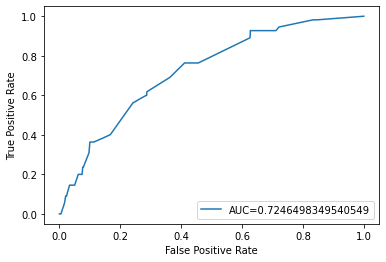

In [42]:
from sklearn import metrics
# plotting auc roc curve for the validation data
y_pred_proba = log_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

##### Observations:
* ***The value of area under the roc curve is 0.72 .***
* ***Sensitivity and specificty are very much predicted good enough to use this model for test data.***

### Decision Tree Model

In [24]:
# importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [25]:
# extracting original data by dropping not significant and target variables, and assigning to X
X = train_data.drop(["gender","Residence_type","stroke"], axis = 1)
y = train_data[["stroke"]]

In [26]:
# X,y split into X_train(70%) ,X_test(30%),y_train(70%),y_test(30%) respectively
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 100)

In [27]:
#create a dictionary of all values we want to test
DT_param = [{'criterion': ['entropy', 'gini'], 'max_depth': [1,2,3,4,5,6,7,8],'min_samples_leaf':  [1,2,3,4,5,6,7,8]}]
# decision tree model
dtree_model=DecisionTreeClassifier()
#use gridsearch to test all values
dtree_cv = GridSearchCV(dtree_model, DT_param,scoring="f1" ,cv=10)
#fit model to data
dtree_cv.fit(X_train, y_train)
print(dtree_cv.best_params_) 

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 3}


In [28]:
# fitting the decision tree model with achieved parameters using hyper parameter tuning
DT_model = DecisionTreeClassifier(criterion = 'gini',max_depth =8, min_samples_leaf =3).fit(X_train,y_train)

# making Predicitions using decison tree 
DT_pred = DT_model.predict(X_test)

# confusion matrix between validation data and predicted data
confusion_matrics = confusion_matrix(y_test, DT_pred)
confusion_matrics

array([[1000,   19],
       [  51,    4]], dtype=int64)

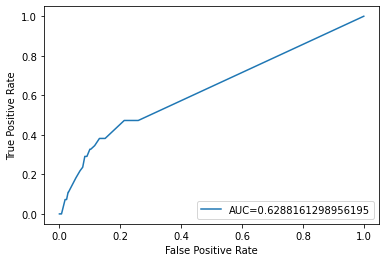

In [56]:
from sklearn import metrics
# plotting auc roc curve for the validation data
y_pred_proba = DT_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

##### Observations:
* ***The value of area under the roc curve is 0.628.***
* ***This model is not good enough to predict True positive.***

### Bagging Model

In [57]:
from sklearn.ensemble import BaggingClassifier

In [58]:
# extracting original data by dropping not significant and target variables, and assigning to X
X = train_data.drop(["gender","Residence_type","stroke"], axis = 1)
y = train_data[["stroke"]]

In [59]:
# X,y split into X_train(70%) ,X_test(30%),y_train(70%),y_test(30%) respectively
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 100)

In [61]:
# assigning bagging model to a variable
bg_model = BaggingClassifier()

# taking parameters range between 10 and 1000
n_estimators = [10,20,30,40,50,60,70,80,90,100]
grid = dict(n_estimators=n_estimators)

# fitting the model to get n_estimators using gridsearch CV
grid_search = GridSearchCV(estimator=bg_model, param_grid=grid, n_jobs=-1, cv=10,scoring= "f1")
grid_result = grid_search.fit(X_train, y_train)

print(grid_result.best_params_) 

{'n_estimators': 70}


In [62]:
#Create a Bagged Decision Tree model object
baggedModel = BaggingClassifier(base_estimator=None, n_estimators=70)

#Train the model using the training set
bagging_model = baggedModel.fit(X_train,y_train)

#The Predicted values (Use test data if you want OOS predictions)
bagging_pred=baggedModel.predict(X_test)

# confusion matrix between validation data and predicted data
confusion_matrics = confusion_matrix(y_test, bagging_pred)
confusion_matrics

array([[1010,    9],
       [  54,    1]], dtype=int64)

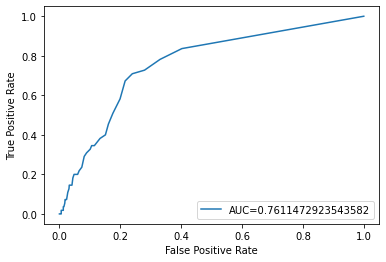

In [63]:
from sklearn import metrics
# plotting auc roc curve for the validation data
y_pred_proba = bagging_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

##### Observations: 
* ***The value of area under the roc curve is 0.76.***
* ***Even specifity is more in this model but our aim is to get equal prediction rate for both 0 and 1.***
* ***Value is increased compared to decision tree but as it is failed to predict positive rate, we should not consider this model for test data.***

## Random Forest

In [64]:
# importing libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [65]:
# extracting original data by dropping not significant and target variables, and assigning to X
X = train_data.drop(["gender","Residence_type","stroke"], axis = 1)
y = train_data[["stroke"]]

In [66]:
# X,y split into X_train(70%) ,X_test(30%),y_train(70%),y_test(30%) respectively
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 100)

In [68]:
# assigning a variable for random forest model for hyper parameter tuning
RF_model  = RandomForestClassifier()

# consisdering parameters to fit the best model
param_grid = { 
    'n_estimators': [20,40,60,80,100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

# fitting the model to get the best parameters
RF_CV = GridSearchCV(estimator=RF_model, param_grid=param_grid, cv= 10, scoring= "f1")
rf_grid = RF_CV.fit(X_train, y_train)

# printing best parameters
print(rf_grid.best_params_) 

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 20}


In [69]:
# fitting the random forest model with the parameters achieved through gridsearch CV
random_model = RandomForestClassifier(criterion= 'gini', max_depth = 7, max_features="auto", n_estimators= 20)
random_forest_model  = random_model.fit(X_train, y_train)

#The Predicted values (Use test data if you want OOS predictions)
RF_pred = random_forest_model.predict(X_test)

# confusion matrix between validation data and predicted data
confusion_matrics = confusion_matrix(y_test, RF_pred)
confusion_matrics

array([[1018,    1],
       [  55,    0]], dtype=int64)

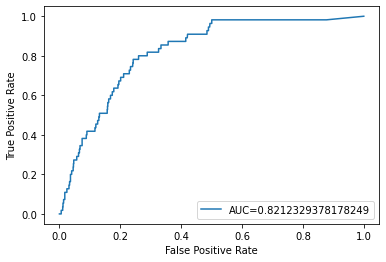

In [70]:
from sklearn import metrics
# plotting auc roc curve for the validation data
y_pred_proba = random_forest_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

##### Observations:
* ***Random forest model predicted 0's with good accuracy but not predicted true positives(1).***
* ***We should not consider area under the roc curve value even it is high.***

### Ada-Boost Model

In [71]:
# importing libraries
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

In [72]:
# extracting original data by dropping not significant and target variables, and assigning to X
X = train_data.drop(["gender","Residence_type","stroke"], axis = 1)
y = train_data[["stroke"]]

In [73]:
# X,y split into X_train(70%) ,X_test(30%),y_train(70%),y_test(30%) respectively
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 100)

In [74]:
# assigning a variable for adaboost classifier model for hyper parameter tuning
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

# considering parameters for adaboosting classifier
parameters = {'base_estimator__max_depth':[2,3,4,5,6,7,8],
              'base_estimator__min_samples_leaf':[2,3,4,5,6,7,8],
              'n_estimators':[10,20,30,40,50,60,70,80,90,100],
              'learning_rate':[0.01,0.001,0.1]}

# fitting the model to get best parameters
grid_search = GridSearchCV(abc, parameters,verbose=3,scoring='f1',n_jobs=-1)
ab_grid = grid_search.fit(X_train,y_train)
print(ab_grid.best_params_) 

Fitting 5 folds for each of 1470 candidates, totalling 7350 fits
{'base_estimator__max_depth': 6, 'base_estimator__min_samples_leaf': 4, 'learning_rate': 0.001, 'n_estimators': 20}


In [75]:
# fitting the adaboost classifier model with the parameters achieved through gridsearch CV
ada_model = AdaBoostClassifier( DecisionTreeClassifier(min_samples_leaf = 4,max_depth = 6),
                               learning_rate = 0.001,                               
                               n_estimators = 20)

adaboost_model  = ada_model.fit(X_train, y_train)

#The Predicted values (Use test data if you want OOS predictions)
abc_pred = random_forest_model.predict(X_test)

# confusion matrix betweenn validation data and predicted data
confusion_matrics = confusion_matrix(y_test, abc_pred)
confusion_matrics

array([[1018,    1],
       [  55,    0]], dtype=int64)

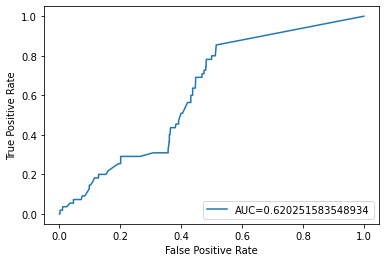

In [76]:
from sklearn import metrics
# plotting auc roc curve for the validation data
y_pred_proba = adaboost_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

##### Observations:
* ***Adaboost classifier model predicted same as the random forest model. Specificity and sensitivity are same.***
* ***The value of area under the roc curve is 0.62.***

* ***By considering all models and calculating metrics of confusion matrix and auc roc value, we have taken logistic regression model as it is predicting true postive and true negative better.***
* ***Testing the data using this model.***

## Model Validation

In [77]:
# considering test data
test_data.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_never smoked,smoking_status_smokes
2572,0,73.0,1,0,1,0,60.98,29.9,0,0,1,0,0,0,0
4523,0,43.0,0,0,1,1,93.30,32.7,0,0,1,0,0,1,0
4733,1,67.0,0,0,1,0,83.16,25.5,0,0,1,0,0,0,0
2073,0,12.0,0,0,0,1,58.14,21.3,0,0,0,0,1,1,0
1786,0,75.0,0,0,1,1,87.69,27.5,0,0,0,1,0,0,0


In [78]:
# using the same data format which is used to train the models
test_X = test_data.drop(["gender","Residence_type","stroke","bmi","age","avg_glucose_level"], axis = 1)
test_y = test_data[["stroke"]]

**Logistic regression model**

In [79]:
# predicting the test data
test_pred = log_model.predict(test_X)

# confusion matrix between test data and predicted data
confusion_matrics = confusion_matrix(test_y, test_pred)
confusion_matrics

array([[1032,  418],
       [  30,   52]], dtype=int64)

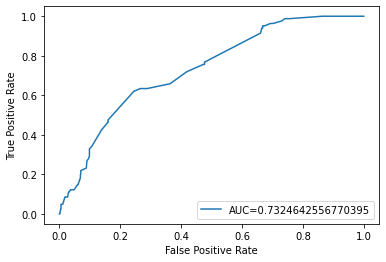

In [80]:
from sklearn import metrics
# plotting auc roc curve for the test data
y_pred_proba = log_model.predict_proba(test_X)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_y,  y_pred_proba)
auc = metrics.roc_auc_score(test_y, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

##### Observations:
* ***The aoc ruc value is 0.73 and this model predicted true positives more than 65%.***

### Conclusion:
* ***All models failed to predict 1's and logistic regression model predicted 0's and 1's better.***
* ***We used class weight in this model to overcome the class imbalance in the data.***
* ***This model achieved 65% sensitivity and 70% specificity.***